<a href="https://colab.research.google.com/github/Praneet9/Weapon_Detection/blob/master/Weapon_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning darknet repository

In [0]:
!git clone https://github.com/pjreddie/darknet

In [0]:
cd darknet/

/content/darknet


# **Replacing default makefile with custom file for GPU and CUDNN binding**

In [0]:
!rm -rf Makefile

In [0]:
!wget http://bda76b68.ngrok.io/Makefile

In [0]:
!make

# Downloading trained weights to test if darknet works!

In [0]:
!wget https://pjreddie.com/media/files/yolov2-tiny.weights

In [0]:
!./darknet detect cfg/yolov2-tiny.cfg yolov2-tiny.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

# Downloading dataset for training

In [0]:
!wget http://bda76b68.ngrok.io/Weapons.zip

In [0]:
!unzip Weapons.zip

In [0]:
!rm -rf Weapons.zip

In [0]:
!mkdir dataset

In [0]:
!mv Weapons/WeaponS/* dataset/

In [0]:
!mv Weapons/out/* dataset/

# Downloading required files for training

In [0]:
!wget http://bda76b68.ngrok.io/obj.data

In [0]:
!wget http://bda76b68.ngrok.io/obj.names

In [0]:
!wget http://bda76b68.ngrok.io/yolov2-tiny.cfg

In [0]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

# Creating training and testing files

In [0]:
import glob, os
# Current directory
# current_dir = os.path.dirname(os.path.abspath(__file__))
# print(current_dir)
current_dir = 'dataset'
# Percentage of images to be used for the test set
percentage_test = 10;
# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w+')  
file_test = open('test.txt', 'w+')
# Populate train.txt and test.txt
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))
    if counter == index_test:
        counter = 1
        file_test.write(current_dir + "/" + title + '.jpg' + "\n")
    else:
        file_train.write(current_dir + "/" + title + '.jpg' + "\n")
        counter = counter + 1

In [0]:
!mv obj.data obj_custom.data

In [0]:
!mv obj_custom.data cfg/

In [0]:
!mv obj.names cfg/

In [0]:
!mv yolov2-tiny.cfg yolov2-tiny-custom.cfg

In [0]:
!mv yolov2-tiny-custom.cfg cfg/

# Training on tiny-yolo

In [0]:
!./darknet detector train cfg/obj_custom.data cfg/yolov2-tiny-custom.cfg darknet19_448.conv.23 >> output.txt

# Testing our trained model

In [0]:
!mv cfg/obj.names ./

In [0]:
!./darknet detector test cfg/obj_custom.data cfg/yolov2-tiny-custom.cfg backup/yolov2-tiny-custom_200000.weights dataset/armas\ \(1005\).jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

In [0]:
from PIL import Image

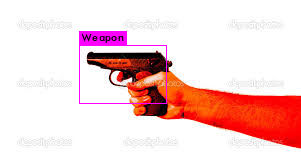

In [0]:
img = Image.open('predictions.jpg')
display(img)

# Converting protobuf file to tensorflow lite

In [0]:
import tensorflow as tf

In [0]:
graph_def_file = 'yolov2-tiny.pb'

In [0]:
input_arrays = ['input']
output_arrays = ['output']

In [0]:
converter = tf.contrib.lite.TocoConverter.from_frozen_graph( graph_def_file, input_arrays, output_arrays)

Instructions for updating:
Use `lite.TFLiteConverter.from_frozen_graph` instead.


In [0]:
tflite_model = converter.convert()
open('model.tflite', 'wb').write(tflite_model)

44116596